In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.svm import SVC 


<h2>讀取資料並且觀察特徵</h2>

In [2]:

data = pd.read_csv("D:\practice\python\side project\藥物分類\drug200.csv")
print(data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [3]:
print("全部資料")
drug_age = data.loc[:,["Drug","Age"]]
drug_age = drug_age.groupby("Drug").mean()
print(drug_age.sort_values("Age"))
print()
print("M")
drug_age_m = data[data["Sex"] == "M"]
drug_age_m = drug_age_m.loc[:,["Drug","Age"]]
drug_age_m = drug_age_m.groupby("Drug").mean()
print(drug_age_m.sort_values("Age"))
print()

print("F")
drug_age_F = data[data["Sex"] == "F"]
drug_age_F = drug_age_F.loc[:,["Drug","Age"]]
drug_age_F = drug_age_F.groupby("Drug").mean()
print(drug_age_F.sort_values("Age"))

全部資料
             Age
Drug            
drugA  35.869565
drugC  42.500000
DrugY  43.747253
drugX  44.018519
drugB  62.500000

M
             Age
Drug            
drugA  38.357143
drugC  42.777778
DrugY  44.750000
drugX  45.814815
drugB  64.900000

F
             Age
Drug            
drugA  32.000000
drugC  42.142857
drugX  42.222222
DrugY  42.808511
drugB  58.500000


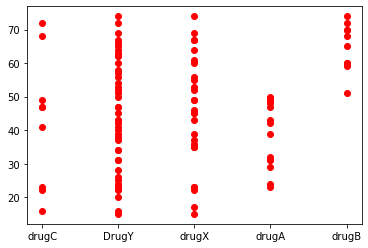

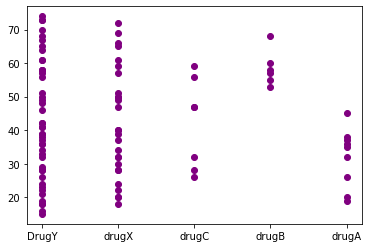

In [4]:
drug_age_m = data[data["Sex"] == "M"]
drug_age_f = data[data["Sex"] == "F"]
plt.scatter(drug_age_m["Drug"],drug_age_m["Age"],color="red")
plt.show()
plt.scatter(drug_age_f["Drug"],drug_age_f["Age"],color="purple")
plt.show()

<h2>計算每一種BP程度上 人們的平均年齡</h2>
<h3>發現三種不同程度上，平均年齡皆差不多</h3>

In [5]:
BP_Age = data.loc[:,["BP","Age"]]
BP_Age = BP_Age.groupby("BP").mean()
print(BP_Age)

              Age
BP               
HIGH    42.233766
LOW     47.031250
NORMAL  44.084746


<h2>計算每一種Cholesterol程度上 人們的平均年齡</h2>
<h3>發現兩種不同程度上，平均年齡皆差不多</h3>

In [6]:
Cholesterol_Age = data.loc[:,["Cholesterol","Age"]]
Cholesterol_Age = Cholesterol_Age.groupby("Cholesterol").mean()
print(Cholesterol_Age)

                   Age
Cholesterol           
HIGH         45.407767
NORMAL       43.154639


<h2>計算每一種不同的藥物種類出現的次數</h2>
<h3>可以發現Y出現最為多次，其次是X</h3>

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64


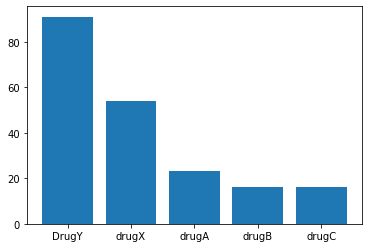

In [7]:
Drug = data["Drug"].value_counts()
print(Drug)

plt.bar(Drug.index, Drug.values)
plt.show()

<h2>計算不同性別出現的次數</h2>
<h3>可以發現男女出現次數差不多 男性略多一些</h3>

M    104
F     96
Name: Sex, dtype: int64


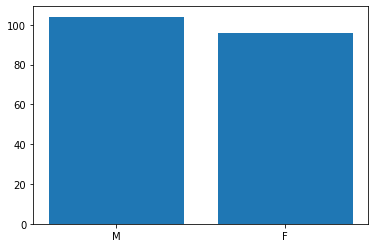

In [8]:
Sex = data["Sex"].value_counts()
print(Sex)

plt.bar(Sex.index, Sex.values)
plt.show()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


<BarContainer object of 3 artists>

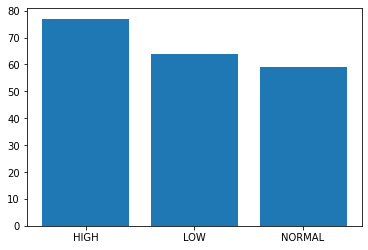

In [9]:
BP = data["BP"].value_counts()
print(BP)
plt.bar(BP.index, BP.values )

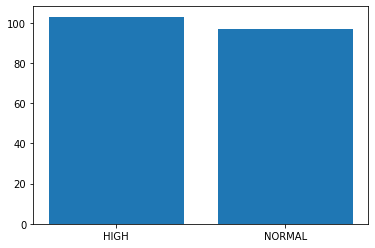

In [10]:
Cholesterol = data["Cholesterol"].value_counts()
plt.bar(Cholesterol.index, Cholesterol.values)
plt.show()


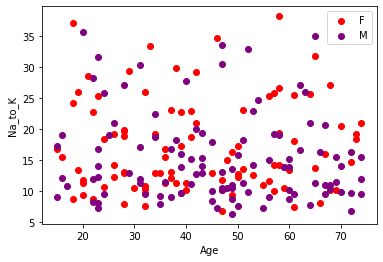

In [11]:



data_F = data[data["Sex"] == "F"]
data_M = data[data["Sex"] == "M"]


plt.scatter(data_F["Age"],data_F["Na_to_K"],  color = "red",label = "F")
plt.scatter(data_M["Age"],data_M["Na_to_K"],  color = "purple", label = "M")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [12]:

data.loc[:,["Age","Na_to_K"]] = StandardScaler().fit_transform(data.loc[:,["Age","Na_to_K"]])####沒有經過標準化的預測結果較好
result_Drug = LabelEncoder().fit_transform(data["Drug"])
data = data.drop("Drug",axis=1)
print(data)

          Age Sex      BP Cholesterol   Na_to_K
0   -1.291591   F    HIGH        HIGH  1.286522
1    0.162699   M     LOW        HIGH -0.415145
2    0.162699   M     LOW        HIGH -0.828558
3   -0.988614   F  NORMAL        HIGH -1.149963
4    1.011034   F     LOW        HIGH  0.271794
..        ...  ..     ...         ...       ...
195  0.708057   F     LOW        HIGH -0.626917
196 -1.715759   M     LOW        HIGH -0.565995
197  0.465676   M  NORMAL        HIGH -0.859089
198 -1.291591   M  NORMAL      NORMAL -0.286500
199 -0.261469   F     LOW      NORMAL -0.657170

[200 rows x 5 columns]


In [13]:
data["BP"] = "BP_"+data["BP"]
data["Cholesterol"] = "Cholesterol_"+data["Cholesterol"]
Sex = pd.get_dummies(data["Sex"])
bp = pd.get_dummies(data["BP"])
Cholesterol = pd.get_dummies(data["Cholesterol"])
data = data.drop(["Sex", "BP", "Cholesterol"],axis=1)
data = pd.concat([data, Sex, bp, Cholesterol], axis=1)
print(data)

          Age   Na_to_K  F  M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
0   -1.291591  1.286522  1  0        1       0          0                 1   
1    0.162699 -0.415145  0  1        0       1          0                 1   
2    0.162699 -0.828558  0  1        0       1          0                 1   
3   -0.988614 -1.149963  1  0        0       0          1                 1   
4    1.011034  0.271794  1  0        0       1          0                 1   
..        ...       ... .. ..      ...     ...        ...               ...   
195  0.708057 -0.626917  1  0        0       1          0                 1   
196 -1.715759 -0.565995  0  1        0       1          0                 1   
197  0.465676 -0.859089  0  1        0       0          1                 1   
198 -1.291591 -0.286500  0  1        0       0          1                 0   
199 -0.261469 -0.657170  1  0        0       1          0                 0   

     Cholesterol_NORMAL  
0                     0  

In [14]:
'''
param = {"C":[10**i for i in range(-4, 6)],
         "kernel":["rbf", "poly","sigmoid" ],
         "gamma":[10**i for i in range(-4, 6)],
         "degree":[i for i in range(1,10)]}
'''

'\nparam = {"C":[10**i for i in range(-4, 6)],\n         "kernel":["rbf", "poly","sigmoid" ],\n         "gamma":[10**i for i in range(-4, 6)],\n         "degree":[i for i in range(1,10)]}\n'

In [15]:
feature_train, feature_test, result_train, result_test = train_test_split(data, result_Drug, test_size = 0.2, random_state = 0)

param = {"C":[10**i for i in range(-4, 6)]}

model = GridSearchCV(SVC(), param_grid=param)
model.fit(feature_train, result_train)
print("訓練分數:",cross_val_score(model, feature_train, result_train).mean())
print("測試分數:", model.score(feature_test, result_test))
print("最佳參數:",model.best_params_)


訓練分數: 0.9125
測試分數: 1.0
最佳參數: {'C': 1}


In [16]:
param = {"C":[1],
         "kernel":["rbf", "poly","sigmoid"]}

model = GridSearchCV(SVC(), param_grid=param)
model.fit(feature_train, result_train)
print("訓練分數:",cross_val_score(model, feature_train, result_train).mean())
print("測試分數:", model.score(feature_test, result_test))
print("最佳參數:",model.best_params_)

訓練分數: 0.925
測試分數: 1.0
最佳參數: {'C': 1, 'kernel': 'rbf'}


In [17]:
param = {"C":[1],
         "kernel":["rbf"],
         "gamma":[10**i for i in range(-4, 6)]}

model = GridSearchCV(SVC(), param_grid=param)
model.fit(feature_train, result_train)
print("訓練分數:",cross_val_score(model, feature_train, result_train).mean())
print("測試分數:", model.score(feature_test, result_test))
print("最佳參數:",model.best_params_)

訓練分數: 0.91875
測試分數: 1.0
最佳參數: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [18]:
param = {"C":[1],
         "kernel":["rbf"],
         "gamma":[0.1],
         "degree":[i for i in range(1,10)]}

model = GridSearchCV(SVC(), param_grid=param)
model.fit(feature_train, result_train)
print("訓練分數:",cross_val_score(model, feature_train, result_train).mean())
print("測試分數:", model.score(feature_test, result_test))
print("最佳參數:",model.best_params_)

訓練分數: 0.91875
測試分數: 1.0
最佳參數: {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
